# Classify the Fashion-MNIST data set using a CNN in a GPU powered notebook

This notebook guides you through the basic steps in constructing a Convolutional Neural Network with the Keras and TensorFlow libraries in IBM Watson Studio, including training the model directly in the notebook using a GPU environment. In the notebook, you will learn how to save the model for future inference, deploy it and score it using the IBM Watson Machine Learning service.

Some familiarity with Python is recommended. This notebook runs on Python 3.6 with Tensorflow 1.12.

## Contents


1.	[Fashion-MNIST data set](#dataset)
2.	[Import the data sets](#importdata)
3.	[Prepare the data sets](#preparedata)
4.	[Define the neural network](#neuralNetwork)
5.	[Train the network](#train)
6.	[Save and Deploy](#deploy)
7.	[Summary](#summary)

<a id="dataset"></a>
<div><img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png", width=450, height=450, align = 'right', style="margin:10px 35px"></div>

## 1. Fashion MNIST data set
You might already have heard of the original <a href="http://yann.lecun.com/exdb/mnist/" target="_blank" rel="noopener no referrer">MNIST data set</a> which contains many handwritten digits. The Fashion-MNIST data set, which you will use in this notebook, is a replacement of the original data set of handwritten digits, which has been overused and is no longer representative for benchmarking machine learning algorithms. The Fashion MNIST data set contains images of Zalando articles. It comprises a training set of 60,000 images and a test set of 10,000 images. Each example in the training and test sets is a 28x28 grayscale image, associated with a label from 10 classes. The first column consists of the class labels (as you can see in the following section) and represents the article of clothing. The remaining columns contain the pixel-values of the associated image. You can read more about the data set <a href="https://github.com/zalandoresearch/fashion-mnist" target="_blank" rel="noopener no referrer">here</a>.

### Labels

Each training and test example is assigned to one of the following labels:

| **Label** | **Description** |
|:----------|:----------------|
|0 	        |T-shirt/top      |
|1 	        |Trouser          |
|2          |Pullover         |
|3 	        |Dress            |
|4 	        |Coat             |
|5 	        |Sandal           |
|6 	        |Shirt            |
|7 	        |Sneaker          |
|8          |Bag              |
|9          |Ankle boot       |


<a id="importdata"></a>

## 2. Import the data sets
To get the Fashion-MNIST training and test data sets:

- Go to [this link](https://www.kaggle.com/zalando-research/fashionmnist) and then download the following data sets in CSV format:

    - `fashion-mnist_train.csv`
    - `fashion-mnist_test.csv`
    
- Save the CSV files to your local file system.

- Load the data files to use in the notebook:

   - On the notebook [action bar](https://dataplatform.cloud.ibm.com/docs/content/analyze-data/parts-of-a-notebook.html?audience=wdp&context=wdp#notebook-action-bar) at the top right corner, click the data icon.
   - In the data panel that pops up, drag and drop or click **browse** to load the two NMIST data sets in your local file system.

The data files are listed on the Files tab and are stored in object storage.

### Insert code to access the training data set
To access the training data in the `fashion-mnist_train.csv` file in your notebook, select the following empty cell, in the right hand side data panel click **Insert to code** below the train CSV file, and then **Insert pandas DataFrame**. After the code is loaded, run the cell to read the CSV file.

**Note**: The name of the returned dataframe will be something like df_data_1. Rename it to **train_df**. The variable **train_df** is used through out the remaining notebook to represent the training data set.

In [1]:
# The code was removed by Watson Studio for sharing.

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Insert code to access the test data set

To access the test data in the `fashion-mnist_test.csv` file in your notebook, select the following empty cell, in the right hand side data panel click **Insert to code** below the test CSV file, and then **Insert pandas DataFrame**. After the code is loaded, run the cell to read the CSV file.

**Note**: The name of the returned dataframe will be something like df_data_1. Rename it to **test_df**. The variable **test_df** is used through out the remaining notebook to represent the test data set.

In [2]:

body = client_73ae0289eca54f3b800daa1c63d6fc43.get_object(Bucket='gpunotebookdemo-donotdelete-pr-skkqjvpa902st8',Key='fashion-mnist_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test_df = pd.read_csv(body)
test_df.head()



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id="preparedata"></a>
## 3. Prepare the data sets
Let's begin the data preparation by normalizing the data dimensions so that they are of approximately the same scale.  Before you can start with this, you need to import the libraries you will be using and then extract the data from the previously loaded data frames into numpy arrays.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

### Split into training, validation and test data sets
Split the training data set comprising 60,000 images of different articles of clothing into a training set and a validation set. The training set should contain 80% of the training data set and the validation set 20%.

In [4]:
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size = 0.2, random_state=44)
print("Shape of the training data set (Features): {}".format(x_train.shape))
print("Shape of the training data set (Labels): {}".format(y_train.shape))
print("Shape of the validation data set (Features): {}".format(x_validate.shape))
print("Shape of the validation data set (Labels): {}".format(y_validate.shape))

Shape of the training data set (Features): (48000, 784)
Shape of the training data set (Labels): (48000,)
Shape of the validation data set (Features): (12000, 784)
Shape of the validation data set (Labels): (12000,)


### Visualize a few articles
Use the imshow() function in the matplotlib library to visualize the greyscale images.

In [5]:
import matplotlib.pyplot as plt
image = x_train[10, :].reshape((28,28))
plt.imshow(image)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<function matplotlib.pyplot.show(*args, **kw)>

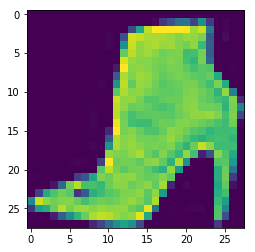

In [7]:
image = x_train[40000, :].reshape((28,28))
plt.imshow(image)
plt.show

<a id="neuralNetwork"></a>

## 4. Define the neural network

Now you will learn how to create a Convolution Neural Network that recognizes Zalando articles in images. Convolutional Neural Networks, or commonly known as CNNs, are class of deep neural networks that is primarily used for visual recognition tasks. In this notebook, you will create a simple CNN based classification model. You will use the Keras framework to build the model. <a href="https://keras.io/" >Keras</a> is a high-level neural networks API, written in Python.

Import the Keras library and then reshape the data sets.

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import Callback

im_rows = 28
im_cols = 28
im_shape = (im_rows, im_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Define the various layers in the network
The CNN model you create will have a convolution layer followed by a pooling layer and then a dropout layer. The output of the dropout layer is flattened into a fully connected layer. The last layer is a dense layer with Softmax activation that classifies the 10 categories of the clothing data images in the Fashion-MNIST data set.

In [7]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=im_shape),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

Before you can start training the model, you need to compile it. For this you will use the model.compile() function. Specify a loss function, an optimizer and the metrics.

In [8]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

<a id="train" ></a>
## 5. Train the neural network
The following code cell starts the model training process, also referred to as model fitting. You will train the model in batches of 200 images in 20 epochs.

In [9]:
cnn_model.fit(
    x_train, y_train, batch_size=200,
    epochs=20, verbose=1,
    validation_data=(x_validate, y_validate)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 9s 184us/step - loss: 0.6196 - acc: 0.7866 - val_loss: 0.4391 - val_acc: 0.8449
Epoch 2/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.4103 - acc: 0.8563 - val_loss: 0.3770 - val_acc: 0.8653
Epoch 3/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.3632 - acc: 0.8731 - val_loss: 0.3442 - val_acc: 0.8761
Epoch 4/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.3315 - acc: 0.8850 - val_loss: 0.3145 - val_acc: 0.8906
Epoch 5/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.3092 - acc: 0.8925 - val_loss: 0.3025 - val_acc: 0.8895
Epoch 6/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.2948 - acc: 0.8969 - val_loss: 0.3152 - val_acc: 0.8812
Epoch 7/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.2801 - acc: 0.9014 - val_loss: 0.2912 - val_ac

### Test accuracy
Test the accuracy of the model. You will see that the model has an accuracy of over 91%.

In [10]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.93595


### Visualize the predictions
You can see how well your model is performing by taking a few images from the test data set and testing how well they are recognized by the model. For this test, you will use image number 100 and 200 from the test data set. You will also visualize the images to see which articles are represented.


 Model predicts the label: [8]


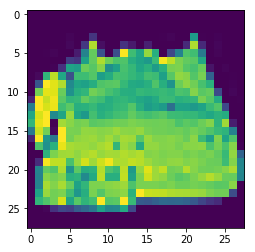

In [11]:
test_img = x_test[100,:].reshape((28,28))
plt.imshow(test_img)
test_img = test_img.reshape(1, *im_shape)
print('\n', 'Model predicts the label:', cnn_model.predict_classes(test_img))


 Model predicts the label: [3]


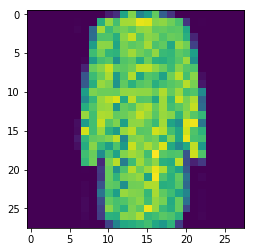

In [12]:
test_img = x_test[200,:].reshape((28,28))
plt.imshow(test_img)
test_img = test_img.reshape(1, *im_shape)
print('\n', 'Model predicts the label:', cnn_model.predict_classes(test_img))

If you check the table with labels, and compare that with the visualizations you see, it looks like the model is predicting clothing articles very well. You have successfully built a CNN with over 90% accuracy.

<a id="deploy" ></a>
# 6. Deploy the model

Now you can deploy this model in the Cloud and get a scoring endpoint. To deploy the model created in this notebook, you need an instance of IBM Watson Machine Learning service. You can see if a Watson Machine Learning service instance is already associated with your project by clicking the **Services** menu in Watson Studio and selecting **Watson Services**. If no service exists, create a [Watson Machine Learning service instance](https://console.ng.bluemix.net/catalog/services/ibm-watson-machine-learning/). 


To get the service credentials:
1. From the **Services** menu in Watson Studio, open **Watson Services** in a new browser tab. (This opens the Watson Services page in Watson Studio.)
2. In the Machine Learning section, click the service instance for which you want to retrieve credentials. (This opens the service details page in IBM Cloud for the Watson Machine Learning service instance.)
3. Click **Service credentials**. If there are no service credentials yet, click the **New credential**.
4. Under the **ACTION** menu, click **View credentials**.
5. Copy the credentials into the following cell.

In [13]:
wml_credentials = {
  "apikey": "oTW1O9BHTHDTMAfp6pzpIIz0Qt3dMefiwIpctW8425YA",
  "iam_apikey_description": "Auto generated apikey during resource-key operation for Instance - crn:v1:bluemix:public:pm-20:us-south:a/5efafa56ac2ecb57a93a28ca9c4ef9b6:bcac73dc-04b9-476b-a46b-cb0de69e673e::",
  "iam_apikey_name": "auto-generated-apikey-799c74ee-248e-47b9-b947-ee787596a543",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/5efafa56ac2ecb57a93a28ca9c4ef9b6::serviceid:ServiceId-e4ddbc78-24d5-458d-8df3-f2fa458ebdb5",
  "instance_id": "bcac73dc-04b9-476b-a46b-cb0de69e673e",
  "password": "d0a13022-5b01-45e9-8205-8709fc6d415c",
  "url": "https://us-south.ml.cloud.ibm.com",
  "username": "799c74ee-248e-47b9-b947-ee787596a543"
}

Import the watson-machine-learning-client and authenticate to the service instance.

In [14]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
client = WatsonMachineLearningAPIClient(wml_credentials)

### Store the trained model in the WML repository
You have  connected to the Watson Machine Learning repository using the Python package and your credentials. Publishing the model will save the model to your repository.

In [15]:
cnn_model.save("keras_fashion_mnist.h5")
!tar -cvf keras_fashion_mnist.tar keras_fashion_mnist.h5
!gzip -f keras_fashion_mnist.tar
model_tar_gz = "keras_fashion_mnist.tar.gz"

metadata = {
        client.repository.ModelMetaNames.AUTHOR_NAME: "Sumit Goyal",
        client.repository.ModelMetaNames.NAME: 'Fashion MNIST with Keras',
        client.repository.ModelMetaNames.FRAMEWORK_NAME: 'tensorflow',
        client.repository.ModelMetaNames.FRAMEWORK_VERSION: '1.12',
        client.repository.ModelMetaNames.RUNTIME_NAME: 'python',
        client.repository.ModelMetaNames.RUNTIME_VERSION: '3.5',
        client.repository.ModelMetaNames.FRAMEWORK_LIBRARIES: [
         {"name": "keras", "version": "2.2.4"}
    ]
}
stored_model_details = client.repository.store_model(model_tar_gz, meta_props=metadata, training_data=None)

keras_fashion_mnist.h5


### Create the online deployment
Now you will deploy the stored model as a web service.

In [16]:
created_deployment = client.deployments.create(stored_model_details['metadata']['guid'], "Fashion MNIST with Keras")



#######################################################################################

Synchronous deployment creation for uid: '01ec6725-4b51-4792-a04e-26e9f8e24802' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='616017e9-2767-43a5-81dc-ed0b79ad24e3'
------------------------------------------------------------------------------------------------






Now you can define and print an online scoring endpoint.


In [17]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/bcac73dc-04b9-476b-a46b-cb0de69e673e/deployments/616017e9-2767-43a5-81dc-ed0b79ad24e3/online


### Score data
Use the following method to run a test scoring request against the deployed model.

In [18]:
score_data = x_test[100].tolist()
scoring_payload = {'values': [score_data]}

Use the client.deployments.score() method to run the scoring.

In [19]:
import json
predictions = client.deployments.score(scoring_endpoint, scoring_payload)
print(json.dumps(predictions, indent=2))

{
  "fields": [
    "prediction",
    "prediction_classes",
    "probability"
  ],
  "values": [
    [
      [
        1.595842513779644e-05,
        5.818360932607902e-06,
        2.4869302706065355e-07,
        3.647633306513853e-08,
        1.2989552260478376e-06,
        3.2485646117574873e-11,
        0.00019787767087109387,
        5.266992952890348e-10,
        0.9997788071632385,
        2.027643164481674e-09
      ],
      8,
      [
        1.595842513779644e-05,
        5.818360932607902e-06,
        2.4869302706065355e-07,
        3.647633306513853e-08,
        1.2989552260478376e-06,
        3.2485646117574873e-11,
        0.00019787767087109387,
        5.266992952890348e-10,
        0.9997788071632385,
        2.027643164481674e-09
      ]
    ]
  ]
}


<a id="summary"></a>
## 7. Summary

You learned how to prepare the Fashion-MNIST data set and how to build and train a Convolutional Neural Network by using the Keras and TensorFlow libraries. By running your notebook in a GPU environment, you could do all the model training and testing directly in your notebook; you didn't have to switch to the IBM Machine Learning service to train your model. In the last section of the notebook, you learned how to save and deploy the model in the Watson Machine Learning service.

### Author

**Sumit Goyal** is a software engineer in the Watson Studio development team at IBM in Germany. He holds a degree in Automation and Industrial IT and is passionate about data analysis, machine learning and the ecosystem for data science.

### License - Fashion-MNIST

The Fashion-MNIST data set is licensed under the MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com 

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE. 

<hr>
Copyright © 2018. This notebook and its source code are released under the terms of the MIT License.

<div style="background:#F5F7FA; height:110px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Love this notebook? </span>
<span style="font-size:15px;color:#152935;float:right;margin-right:40px;">Don't have an account yet?</span><br>
<span style="color:#5A6872;">Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style="border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;"><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
</div>